# - ***By Anurag Porte***
---

# **GRIP  - The Sparks Foundation**
## **Data Science and Business Analytics Intern**

### TASK 3 : Exploratory Data Analysis - Retail
- Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
- As a business manager, try to find out the weak areas where you can 
work to make more profit. 
- **P.S. -What all business problems you can derive by exploring the data?**

**Dataset source** - https://bit.ly/3i4rbWl



#### **Importing all necessary modules**

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### **Importing Superstore Data**

In [97]:
#Loading the dataset
df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [98]:
df.shape

(9994, 13)

#### **Exploring of the Data**

In [99]:
df.describe() #Showing the descriptive statistics of data

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [100]:
df.nunique() #Count distinct observations over the respective columns

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [101]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### **New dataframe after dropping out the un-necessary columns**

In [102]:
new_df = df.drop(['Country', 'City', 'Postal Code'], axis=1)

In [103]:
new_df.drop_duplicates(subset = None, inplace = True)
new_df

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#### **Exploring Data with Features**

*  Correlation b/w features

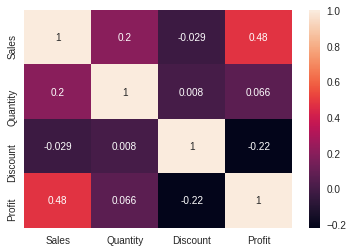

In [104]:
correlation = new_df.corr() # Check the pairwise correlation of columns
sns.heatmap(correlation, annot=True)

*  Pairwise relation plot

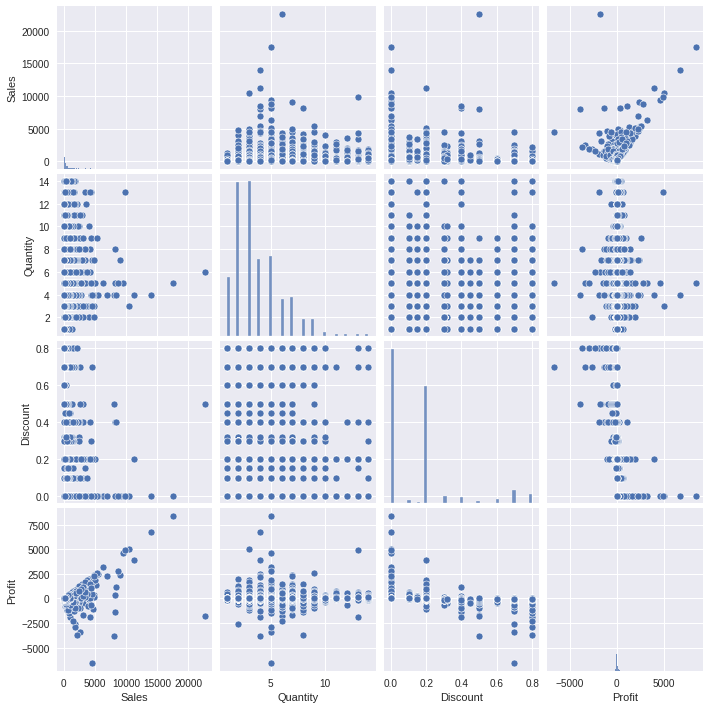

In [105]:
sns.pairplot(new_df)

*  Relation plot -  "Profit" vs "Sales" of Category in different region 

<Figure size 432x288 with 0 Axes>

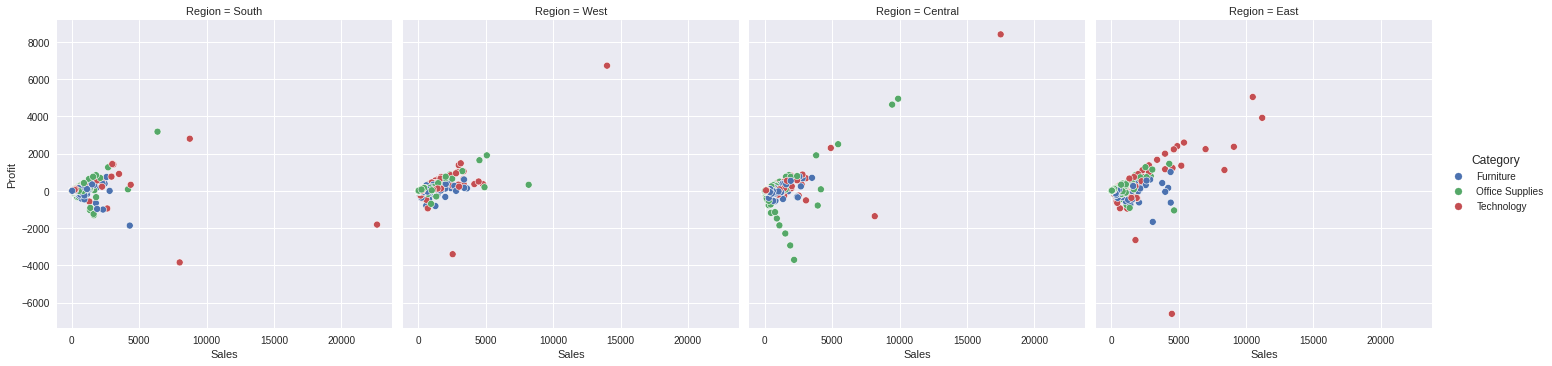

In [106]:
plt.figure()
sns.relplot(x = 'Sales', y = 'Profit', hue='Category', data=new_df, col='Region')

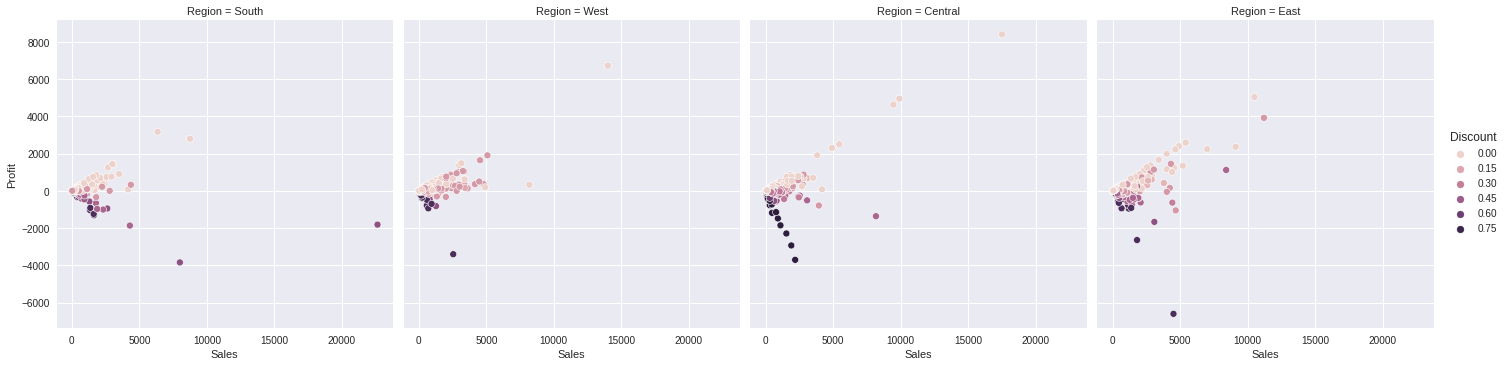

In [107]:
sns.relplot(x = 'Sales', y = 'Profit', hue='Discount', data=new_df, col="Region")

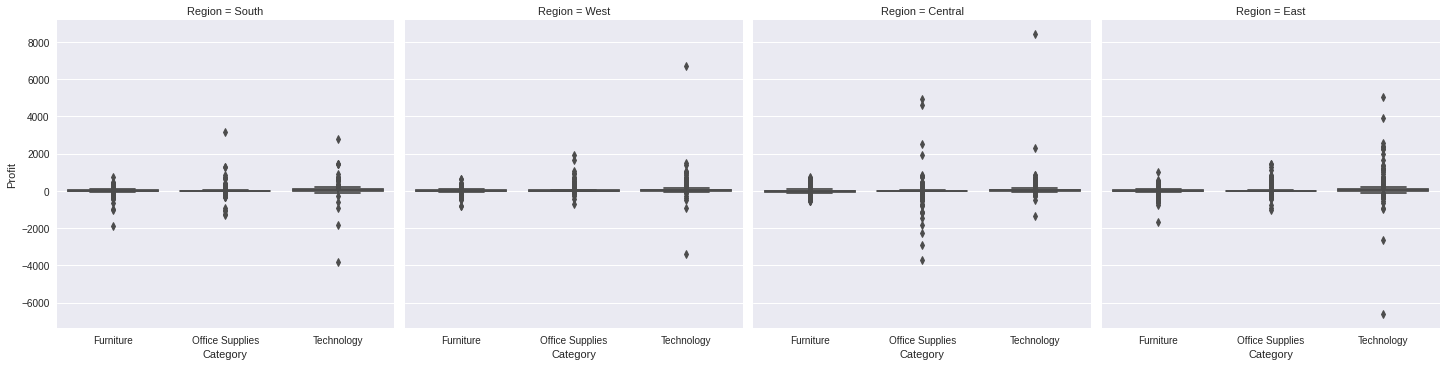

In [108]:
sns.catplot(x='Category',y='Profit',data=new_df, col="Region", kind="box")

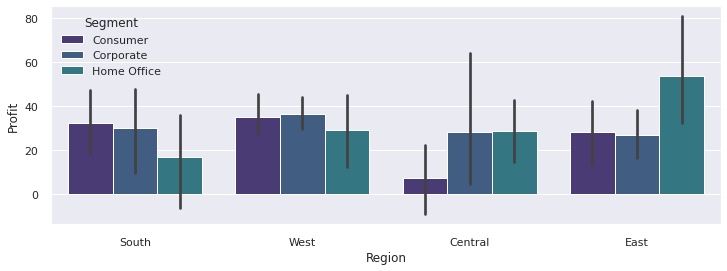

In [109]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(x = "Region",y = "Profit" ,hue = "Segment", data = new_df)

In [110]:
Top10_Sales = new_df.groupby("State").Sales.sum().nlargest(n =10)
Top10_Profits = new_df.groupby("State").Profit.sum().nlargest(n =10)

In [111]:
Top10_Sales.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')

In [112]:
Top10_Profits.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

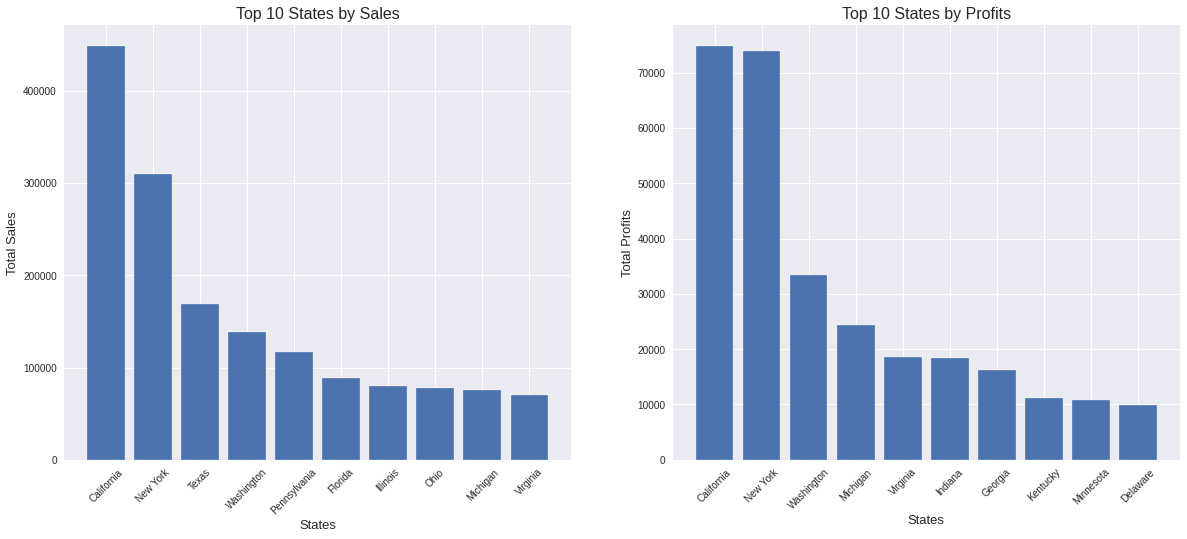

In [132]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))
plt.style.use('seaborn')

ax1.bar(Top10_Sales.index, Top10_Sales)
ax1.set_xlabel("States", fontsize =13)
ax1.set_ylabel("Total Sales",fontsize =13)
ax1.set_title("Top 10 States by Sales",fontsize =16)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax2.bar(Top10_Profits.index, Top10_Profits)
ax2.set_xlabel("States", fontsize =13)
ax2.set_ylabel("Total Profits",fontsize =13)
ax2.set_title("Top 10 States by Profits",fontsize =16)
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
plt.show()

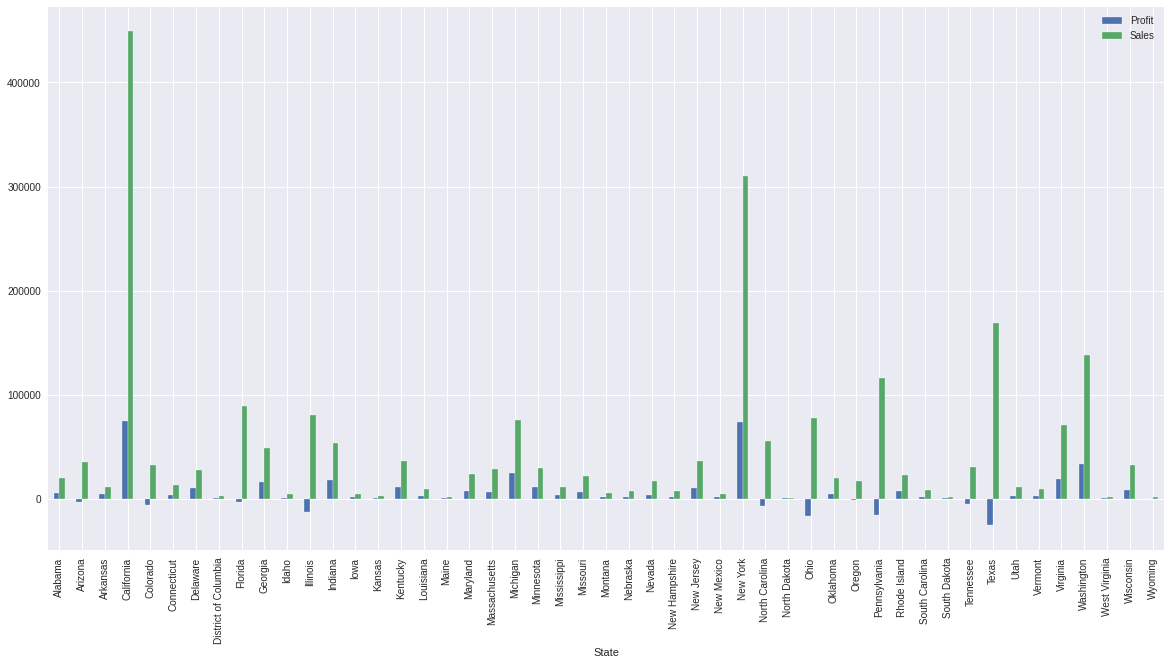

In [133]:
swpl = new_df['State'].value_counts().nlargest(10)
swpl #Here, swpl stands for State wise profit and loss
new_df.groupby('State')[['Profit','Sales']].sum().plot.bar(figsize = (20,10))

#### **Conclusion**
We made multiple observations based on this analysis: \

- We are suffering losses in Texas, Pennsylvania, Illinois, Ohio. We must see the demand of particular category in that regions.
- We have to concentrate on the Sales of 'West Virginia' State and 'San Luis Obispo' and 'Woodland' City which is a weak area.
- In technology category we see more profit, this is because we give less discount.
- More the Discount, Sales goes up but Profit goes down